In [1]:
import json
import numpy as np
import pandas as pd
from openpyxl import Workbook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# data = pd.read_excel('Ground_truth_V3.xlsx')
# data = pd.DataFrame(data)
# data["ground truth"].count()

In [4]:
# Total_GT = 2125

In [5]:
data = pd.read_excel('Ground_truth_V2.xlsx')
data = pd.DataFrame(data)
data = data.fillna("")

### Filling the ground truth column based on extracted entity type comparison and marking TP and FP for the sources

In [6]:
for i in range(len(data)):
    count_Y = 0
    for k in ["Discovery","Spacy","Html"]:
        if (data.loc[i,k] != ""):
            for j in ["P_"+k,"J_"+k,"S_"+k]:
                if (data.loc[i,j] == "Y"):
                    count_Y+=1
            if (count_Y >=2):
                if (len(data.loc[i,"ground truth"])==0):
                    data.loc[i,"ground truth"] += data.loc[i,k]
                else:
                    data.loc[i,"ground truth"] += "/"+data.loc[i,k]
        count_Y = 0

In [7]:
for i in range(len(data)):
    
    lists = data.loc[i,"ground truth"].split("/")
    
    for k in ["Discovery","Spacy","Html"]:
            
        if (data.loc[i,k] in lists and len(data.loc[i,k])!=0 and len(data.loc[i,"ground truth"])!=0):
            data.loc[i,k+"_vote"] = "TP"
        
        if (data.loc[i,k] not in lists and len(data.loc[i,k])!=0 and len(data.loc[i,"ground truth"])!=0):
            data.loc[i,k+"_vote"] = "FP"

#### #### THE TP AND FP MARKED TABLE IS SAVED AS 'Ground_Truth_Labelled'

In [8]:
# data.to_csv('Ground_Truth_Labelled.csv',index=False)   # To save a labelled csv file

In [9]:
Total_GT = data['ground truth'].count()

In [10]:
Total_GT

2848

In [11]:
data["Discovery_vote"].value_counts()

      1960
TP     858
FP      30
Name: Discovery_vote, dtype: int64

In [12]:
Precision = 858/(858+30)
Recall = 858/Total_GT

Stats_disc = {"Precision": Precision,"Recall":Recall}

In [13]:
data["Spacy_vote"].value_counts()

TP    1507
      1243
FP      98
Name: Spacy_vote, dtype: int64

In [14]:
Precision = 1507/(1507+98)
Recall = 1507/Total_GT

Stats_spac = {"Precision": Precision,"Recall":Recall}

In [15]:
data["Html_vote"].value_counts()

      2035
TP     799
FP      14
Name: Html_vote, dtype: int64

In [16]:
Precision = 799/(799+14)
Recall = 799/Total_GT

Stats_Html = {"Precision": Precision,"Recall":Recall}

In [17]:
print("Discovery")
print(Stats_disc)
print("--"*50)
print("Spacy")
print(Stats_spac)
print("--"*50)
print("HTML")
print(Stats_Html)
print("--"*50)

Discovery
{'Precision': 0.9662162162162162, 'Recall': 0.3012640449438202}
----------------------------------------------------------------------------------------------------
Spacy
{'Precision': 0.9389408099688473, 'Recall': 0.5291432584269663}
----------------------------------------------------------------------------------------------------
HTML
{'Precision': 0.982779827798278, 'Recall': 0.28054775280898875}
----------------------------------------------------------------------------------------------------


# Visualization

In [18]:
data["ground truth"]

0                   
1                   
2            ORDINAL
3                   
4                org
            ...     
2843                
2844    LOC/location
2845                
2846                
2847        Quantity
Name: ground truth, Length: 2848, dtype: object

In [19]:
# This list is for storing all the entity types offered in Discovery

entity_type=['Location',
 'Person',
 'Organization',
 'JobTitle',
 'Company',
 'Quantity',
 'Facility',
 'GeographicFeature',
 'EmailAddress',
 'PrintMedia',
 'HealthCondition',
 'Crime',
 'Sport',
 'Drug',
 'TwitterHandle',
 'Hashtag',
 'Broadcaster',
 'Movie',
 'Vehicle',
 'Award',
 'Anatomy',
 'NaturalEvent',
 'TelevisionShow',
 'SportingEvent',
 'MusicGroup',
 'IPAddress']

In [20]:
# This list is for storing all the entity types offered in Spacy


entity_type_2=['CARDINAL',
 'ORG',
 'DATE',
 'FAC',
 'PERSON',
 'WORK_OF_ART',
 'LOC',
 'ORDINAL',
 'GPE',
 'NORP',
 'PERCENT',
 'QUANTITY',
 'PRODUCT',
 'MONEY',
 'EVENT',
 'TIME',
 'LAW',
 'LANGUAGE']

In [21]:
# This list is for storing all the entity types offered in Naviga

entity_type_3=['person', 'org', 'location', 'chron', 'money', 'a']

In [22]:
# Storing all the entity types from 3 sources in a single dictionary
# a is the master dictionary containing all the 

a={}
for i in range(len(data)):
    lists = data.loc[i,"ground truth"].split("/")
    for item in lists:
        if item in a:
            a[item]+=1
        else:
            a[item]=1

In [23]:
# Storing all the total number of entities in a 

for entity in [entity_type,entity_type_2,entity_type_3]:
    l=[]
    for i in entity:
        if i in a:
            l.append(a[i])
        else:
            l.append(0)
#     plt.figure(figsize=(12,8))
#     sn.barplot(y=entity,x=l,orient=0)
    for p,q in zip(entity,l):
        print(p,q)
    print("-"*50)
#     plt.show()

Location 177
Person 236
Organization 145
JobTitle 46
Company 31
Quantity 128
Facility 57
GeographicFeature 8
EmailAddress 2
PrintMedia 8
HealthCondition 4
Crime 3
Sport 10
Drug 0
TwitterHandle 1
Hashtag 1
Broadcaster 3
Movie 0
Vehicle 0
Award 0
Anatomy 0
NaturalEvent 0
TelevisionShow 1
SportingEvent 0
MusicGroup 0
IPAddress 0
--------------------------------------------------
CARDINAL 258
ORG 255
DATE 180
FAC 24
PERSON 281
WORK_OF_ART 12
LOC 17
ORDINAL 36
GPE 199
NORP 34
PERCENT 39
QUANTITY 114
PRODUCT 5
MONEY 30
EVENT 11
TIME 45
LAW 6
LANGUAGE 6
--------------------------------------------------
person 205
org 182
location 252
chron 89
money 51
a 20
--------------------------------------------------


### VISUALIZING THE ENTITIES EXTRACTED
### 1ST IS DISCOVERY
### 2ND IS SPACY
### 3RD IS NAVIGA

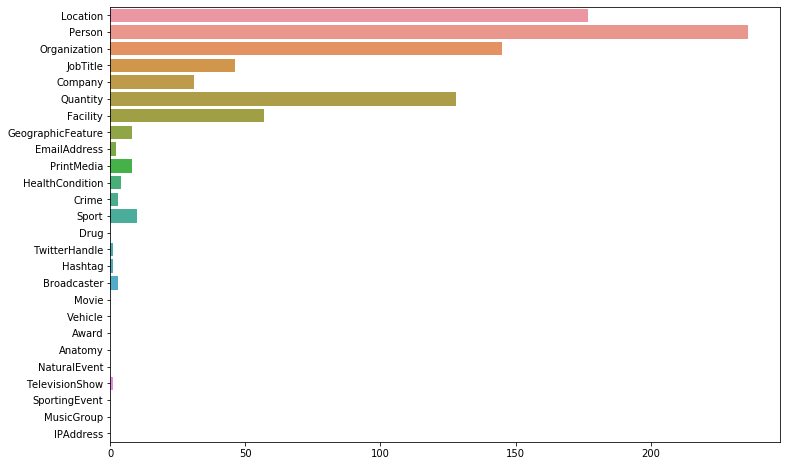

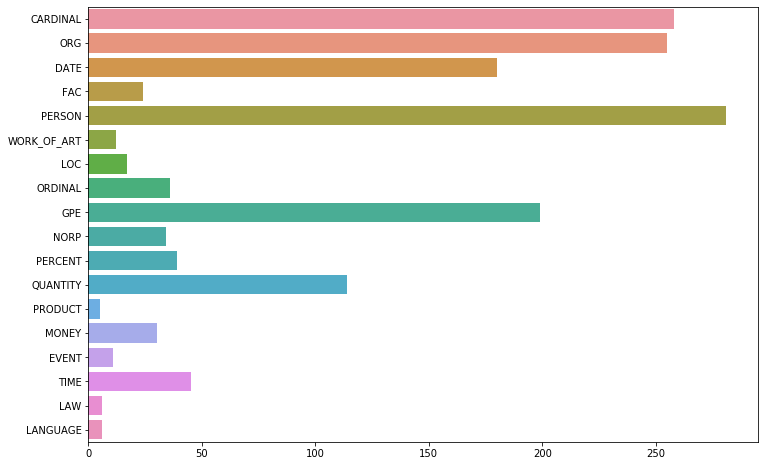

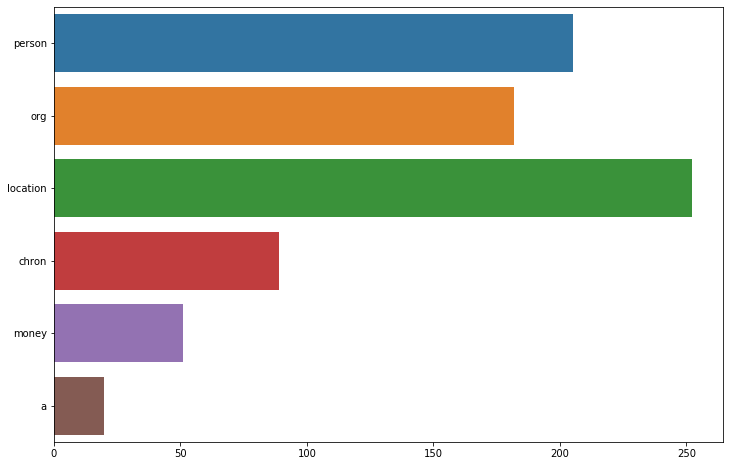

In [24]:

for entity in [entity_type,entity_type_2,entity_type_3]:
    l=[]
    for i in entity:
        if i in a:
            l.append(a[i])
        else:
            l.append(0)
    plt.figure(figsize=(12,8))
    sn.barplot(y=entity,x=l,orient=0)
#     for p,q in zip(entity,l):
#         print(p,q)
    plt.show()

In [25]:
# Storing those entity types for which more than 25 entities have been extracted

b={}
for i in a:
    if a[i]>25:
        b[i]=a[i]

In [26]:
b

{'': 723,
 'ORDINAL': 36,
 'org': 182,
 'CARDINAL': 258,
 'Organization': 145,
 'ORG': 255,
 'DATE': 180,
 'PERCENT': 39,
 'Person': 236,
 'PERSON': 281,
 'person': 205,
 'Location': 177,
 'GPE': 199,
 'location': 252,
 'Quantity': 128,
 'NORP': 34,
 'QUANTITY': 114,
 'JobTitle': 46,
 'Facility': 57,
 'chron': 89,
 'money': 51,
 'MONEY': 30,
 'TIME': 45,
 'Company': 31}

#### CREATING AN EMPTY DICTIONARY FOR EACH OF THE SOURCES TO STORE RESULTS LATER

In [27]:
Htm,Spa,Dis = {},{},{}

for i in list(b.keys()):
    if i in entity_type_3:
        Htm[i]=0        

for i in list(b.keys()):
    if i in entity_type_2:
        Spa[i]=0
        
for i in list(b.keys()):
    if i in entity_type:
        Dis[i]=0


In [28]:
print(Htm)
print(Spa)
print(Dis)

{'org': 0, 'person': 0, 'location': 0, 'chron': 0, 'money': 0}
{'ORDINAL': 0, 'CARDINAL': 0, 'ORG': 0, 'DATE': 0, 'PERCENT': 0, 'PERSON': 0, 'GPE': 0, 'NORP': 0, 'QUANTITY': 0, 'MONEY': 0, 'TIME': 0}
{'Organization': 0, 'Person': 0, 'Location': 0, 'Quantity': 0, 'JobTitle': 0, 'Facility': 0, 'Company': 0}


In [29]:
# A Function to calculate and return the precision and recall

def rec_pre(d,Total_type):
    a={}
    p=d["TP"]/(d["TP"]+d["FP"])
    r=d["TP"]/Total_type
    a["Precision"]=p
    a["Recall"]=r
    return(a)

#### For the consecutive cells, manually the entites have been taken into account which were extracted in other sources in relevance 

#### to Naviga's individual entities

In [30]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("money" in data.loc[i][12] or ("Quantity" in lis)or ("MONEY" in lis)):
        x=data.loc[i][13]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Htm["money"]=rec_pre(d,Total_type)

In [31]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("person" in data.loc[i][12] or ("Person" in lis)or ("PERSON" in lis)):
        x=data.loc[i][13]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Htm["person"]=rec_pre(d,Total_type)

In [32]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("org" in data.loc[i][12] or ("Organization" in lis)or ("ORG" in lis) or ("Company" in lis) or ("PrintMedia" in lis) or ("Broadcaster" in lis)):
        x=data.loc[i][13]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Htm["org"]=rec_pre(d,Total_type)

In [33]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("location" in data.loc[i][12] or ("Location" in lis)or ("ORG" in lis) or ("GPE" in lis) ):
        x=data.loc[i][13]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Htm["location"]=rec_pre(d,Total_type)

In [34]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("chron" in data.loc[i][12] or ("DATE" in lis)or ("TIME" in lis) ):
        x=data.loc[i][13]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Htm["chron"]=rec_pre(d,Total_type)

#### For the consecutive cells, manually the entites have been taken into account which were extracted in other sources in relevance 

#### to Spacy's individual entities

In [35]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("ORDINAL" in data.loc[i][7]):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["ORDINAL"]=rec_pre(d,Total_type)

In [36]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("CARDINAL" in data.loc[i][7]):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["CARDINAL"]=rec_pre(d,Total_type)

In [37]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("ORG" in data.loc[i][7] or ("PrintMedia" in lis)or("Broadcaster" in lis)or("Company" in lis)or("Organization" in lis)or("org" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["ORG"]=rec_pre(d,Total_type)

In [38]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("DATE" in data.loc[i][7] or ("chron" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["DATE"]=rec_pre(d,Total_type)

In [39]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("PERCENT" in data.loc[i][7]):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["PERCENT"]=rec_pre(d,Total_type)

In [40]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("PERSON" in data.loc[i][7] or ("Person" in lis)or ("person" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["PERSON"]=rec_pre(d,Total_type)

In [41]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("GPE" in data.loc[i][7] or ("Location" in lis)or ("location" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["GPE"]=rec_pre(d,Total_type)

In [42]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("NORP" in data.loc[i][7]):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["NORP"]=rec_pre(d,Total_type)

In [43]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("MONEY" in data.loc[i][7] or ("Quantity" in lis)or ("money" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["MONEY"]=rec_pre(d,Total_type)

In [44]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("QUANTITY" in data.loc[i][7] or ("Quantity" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["QUANTITY"]=rec_pre(d,Total_type)

In [45]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("TIME" in data.loc[i][7] or ("chron" in lis)):
        x=data.loc[i][8]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Spa["TIME"]=rec_pre(d,Total_type)

#### For the consecutive cells, manually the entites have been taken into account which were extracted in other sources in relevance 

#### to Discovery's individual entities

In [46]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Organization" in data.loc[i][2] or ("org" in lis) or ("ORG" in lis)):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Organization"]=rec_pre(d,Total_type)

In [47]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Person" in data.loc[i][2] or ("PERSON" in lis)or("person" in lis)):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Person"]=rec_pre(d,Total_type)

In [48]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Location" in data.loc[i][2] or ("GPE" in lis) or ("location")):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Location"]=rec_pre(d,Total_type)

In [49]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Quantity" in data.loc[i][2] or ("QUANTITY" in lis) or ("PERCENT" in lis) or ("money" in lis)):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Quantity"]=rec_pre(d,Total_type)

In [50]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("JobTitle" in data.loc[i][2]):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["JobTitle"]=rec_pre(d,Total_type)

In [51]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Facility" in data.loc[i][2] or ("FAC" in lis)):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Facility"]=rec_pre(d,Total_type)

In [52]:
d={"TP":0,"FP":0}
Total_type = 0
for i in range(len(data)):
    lis = data.loc[i][1].split("/")
    if ("Company" in data.loc[i][2]):
        x=data.loc[i][3]
        Total_type+=1
        if x in ["TP","FP"]:
            d[x]+=1
Dis["Company"]=rec_pre(d,Total_type)

#### Checking the filled dictionaries

In [53]:
Htm

{'org': {'Precision': 0.9639175257731959, 'Recall': 0.44},
 'person': {'Precision': 0.981042654028436, 'Recall': 0.5447368421052632},
 'location': {'Precision': 0.9798270893371758, 'Recall': 0.5492730210016155},
 'chron': {'Precision': 1.0, 'Recall': 0.356},
 'money': {'Precision': 1.0, 'Recall': 0.31097560975609756}}

In [54]:
Spa

{'ORDINAL': {'Precision': 1.0, 'Recall': 1.0},
 'CARDINAL': {'Precision': 0.9922480620155039, 'Recall': 0.8619528619528619},
 'ORG': {'Precision': 0.82, 'Recall': 0.41624365482233505},
 'DATE': {'Precision': 0.9494949494949495, 'Recall': 0.42727272727272725},
 'PERCENT': {'Precision': 1.0, 'Recall': 0.975},
 'PERSON': {'Precision': 0.8307692307692308, 'Recall': 0.5410821643286573},
 'GPE': {'Precision': 0.8129770992366412, 'Recall': 0.5298507462686567},
 'NORP': {'Precision': 0.9142857142857143, 'Recall': 0.8421052631578947},
 'QUANTITY': {'Precision': 0.9738562091503268, 'Recall': 0.6962616822429907},
 'MONEY': {'Precision': 0.9294117647058824, 'Recall': 0.4114583333333333},
 'TIME': {'Precision': 0.9439252336448598, 'Recall': 0.7890625}}

In [55]:
Dis

{'Organization': {'Precision': 0.9521276595744681,
  'Recall': 0.4172494172494173},
 'Person': {'Precision': 0.9673469387755103, 'Recall': 0.5808823529411765},
 'Location': {'Precision': 0.9662162162162162, 'Recall': 0.3012640449438202},
 'Quantity': {'Precision': 0.9846153846153847, 'Recall': 0.45390070921985815},
 'JobTitle': {'Precision': 1.0, 'Recall': 0.92},
 'Facility': {'Precision': 0.90625, 'Recall': 0.6823529411764706},
 'Company': {'Precision': 0.7894736842105263, 'Recall': 0.6382978723404256}}

### LOADING GT TABLE AND CALCULATING PRECISION FOR ALL ENTITY TYPES FOR DISCOVERY

In [82]:
df_di = pd.read_excel("Discovery_all_100eg.xlsx",sheet_name="Sheet2")

In [83]:
df_c=df_di[["P","J","S"]]

In [84]:
df_c.fillna(1,inplace=True)

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df_c["TP"] = df_c.sum(axis=1)

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_c["TP"]=df_c["TP"].replace(1.0,0)
df_c["TP"]=df_c["TP"].replace(3.0,1)
df_c["TP"]=df_c["TP"].replace(2.0,1)


c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [87]:
df_di["TP"]=df_c["TP"]

In [88]:
df_di

,Entities,Examples,P,J,S,TP,FP
0,Person,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,George Floyd,NaN,NaN,NaN,1.0,NaN
2,NaN,Derek Chauvin,NaN,NaN,NaN,1.0,NaN
3,NaN,Donald Trump,NaN,NaN,NaN,1.0,NaN
4,NaN,coronavirus,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2515,NaN,Soundgarden,NaN,NaN,NaN,1.0,NaN
2516,NaN,Steppenwolf,NaN,0.0,NaN,1.0,NaN
2517,NaN,Styx,NaN,NaN,NaN,1.0,NaN
2518,NaN,Talking Heads,NaN,NaN,NaN,1.0,NaN


In [89]:
df_di["Entities"]=df_di["Entities"].fillna(method='ffill')

In [90]:
df_stats=df_di.groupby("Entities").sum()

In [91]:
df_stats["TP"]=df_stats["TP"]-1 # SUBTRACTING THE EXTRA ENTITY CALCULATED (NEXT CATEGORY)

In [92]:
df_stats["TP+FP"]=df_di.groupby("Entities").count()["Examples"]

In [93]:
df_stats.drop(["P","J","S"],axis=1,inplace=True)

In [94]:
df_stats["FP"] = df_stats["TP+FP"]-df_stats["TP"]

In [95]:
df_stats["Precision"] = df_stats["TP"]/df_stats["TP+FP"]    # *100 in TP

In [96]:
df_stats = df_stats.sort_values(by='Precision',ascending=False)

In [97]:
df_stats

,TP,FP,TP+FP,Precision
Entities,,,,
Anatomy,100.0,0.0,100,1.000000
Hashtag,100.0,0.0,100,1.000000
EmailAddress,100.0,0.0,100,1.000000
Movie,100.0,0.0,100,1.000000
IPAddress,100.0,0.0,100,1.000000
TwitterHandle,99.0,1.0,100,0.990000
Crime,97.0,1.0,98,0.989796
SportingEvent,59.0,1.0,60,0.983333
Quantity,98.0,2.0,100,0.980000


In [98]:
Disc = pd.Series(df_stats.Precision.values,index=df_stats.index).to_dict() # Dictionary to store precision of all entities

In [99]:
# Storing the common entities and equivalent of Spacy's keys

entity_rep = ['Organization','Person','Location','Date','Money','Quantity']
S = ['ORG','PERSON','LOC','DATE','MONEY','GPE','QUANTITY']

In [100]:
Discovery = []
Spacy = []
Html = []

Discovery.append(Disc['Organization'])
Spacy.append(Spa['ORG']['Precision'])
Html.append(Htm['org']['Precision'])


Discovery.append(Disc['Person'])
Spacy.append(Spa['PERSON']['Precision'])
Html.append(Htm['person']['Precision'])

Discovery.append(Disc['Location'])
Spacy.append(Spa['GPE']['Precision'])
Html.append(Htm['location']['Precision'])

Discovery.append(0)
Spacy.append(Spa['DATE']['Precision'])
Html.append(Htm['chron']['Precision'])

Discovery.append(0)
Spacy.append(Spa['MONEY']['Precision'])
Html.append(Htm['money']['Precision'])

Discovery.append(Disc['Quantity'])
Spacy.append(Spa['QUANTITY']['Precision'])
Html.append(0)

for key,value in Spa.items():    
    if key not in S and key not in entity_rep:        
        Spacy.append(Spa[key]['Precision'])
        Discovery.append(0)
        Html.append(0)
        entity_rep.append(key)

for key,value in Disc.items():    
    if key not in S and key not in entity_rep:        
        Discovery.append(Disc[key])
        Spacy.append(0)
        Html.append(0)
        entity_rep.append(key)


In [101]:
import plotly.graph_objects as go

In [102]:
fig = go.Figure(data=[
    go.Bar(name='Naviga', x=entity_rep, y=Html),
    go.Bar(name='Spacy', x=entity_rep, y=Spacy),
    go.Bar(name='Discovery', x=entity_rep, y=Discovery)],
    layout={'title':"Precision Graph"}
)
# Change the bar mode
# fig.update_layout(barmode='group')

fig.show()


#### RECALL

In [103]:
D2 = []
S2 = []
H2 = []

In [104]:
entity_rep = ['Organization','Person','Location','Date','Money','Quantity']
S = ['ORG','PERSON','LOC','DATE','MONEY','GPE','QUANTITY']

In [105]:
D2.append(Dis['Organization']['Recall'])
S2.append(Spa['ORG']['Recall'])
H2.append(Htm['org']['Recall'])


D2.append(Dis['Person']['Recall'])
S2.append(Spa['PERSON']['Recall'])
H2.append(Htm['person']['Recall'])

D2.append(Dis['Location']['Recall'])
S2.append(Spa['GPE']['Recall'])
H2.append(Htm['location']['Recall'])

D2.append(0)
S2.append(Spa['DATE']['Recall'])
H2.append(Htm['chron']['Recall'])

D2.append(0)
S2.append(Spa['MONEY']['Recall'])
H2.append(Htm['money']['Recall'])

D2.append(Dis['Quantity']['Recall'])
S2.append(Spa['QUANTITY']['Recall'])
H2.append(0)

for key,value in Spa.items():    
    if key not in S:        
        S2.append(Spa[key]['Recall'])
        D2.append(0)
        H2.append(0)
        entity_rep.append(key)
        S.append(key)

for key,value in Dis.items():    
    if key not in entity_rep:        
        D2.append(Dis[key]['Recall'])
        S2.append(0)
        H2.append(0)
        entity_rep.append(key)



In [106]:
fig = go.Figure(data=[
    go.Bar(name='Naviga', x=entity_rep, y=H2),
    go.Bar(name='Spacy', x=entity_rep, y=S2),
    go.Bar(name='Discovery', x=entity_rep, y=D2)],
    layout={'title':"Recall Graph"}
)
# Change the bar mode
# fig.update_layout(barmode='group')

fig.show()


In [107]:
fig = go.Figure(data=[
    go.Bar(x=['Discovery','Spacy','Naviga'], y=[len(entity_type),len(entity_type_2),len(entity_type_3)])]
)

fig.show()